In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from skimage import io

/home/anna/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
path = '../../Data/best_deconvolution/'
name = 'cell_000.tif'
inputpath = 'input/'
convpath = 'noise/psf_sigma_0.5_aspect_ratio_4.5_voxel_size_[0.3_0.3_0.3]_noise_poisson_snr=2.0/'
deconvpath = 'deconvolved/'
deconvpath2 = 'psf_sigma_0.5_aspect_ratio_4.5_voxel_size_[0.3_0.3_0.3]_noise_poisson_snr=2.0/'
comparepath = ['deconvolution_lab_rif_regularization_lambda=100.0/',
               'deconvolution_lab_rltv_regularization_lambda=0.01_iterations=5.0/',
               'iterative_deconvolve_3d_detect=False_low=2.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/']

In [3]:
img = io.imread(path + inputpath + name)
stack = [img[:,int(img.shape[1]/2)]]
img = io.imread(path + convpath + name)
stack.append(img[:,int(img.shape[1]/2)])
labels = ['input', 'convolved', 'RIF', 'RLTV', 'DAMAS']
for cpath in comparepath:
    img = io.imread(path + deconvpath + cpath + deconvpath2 + name)
    img = img - img.min()
    img = img / img.max() *255
    stack.append(img[:,int(img.shape[1]/2)])
pad_width = int((stack[1].shape[1]*3 - stack[0].shape[1])/2)
stack[0] = np.pad(stack[0], pad_width)
print(stack[0].shape, stack[1].shape)

(263, 290) (144, 97)


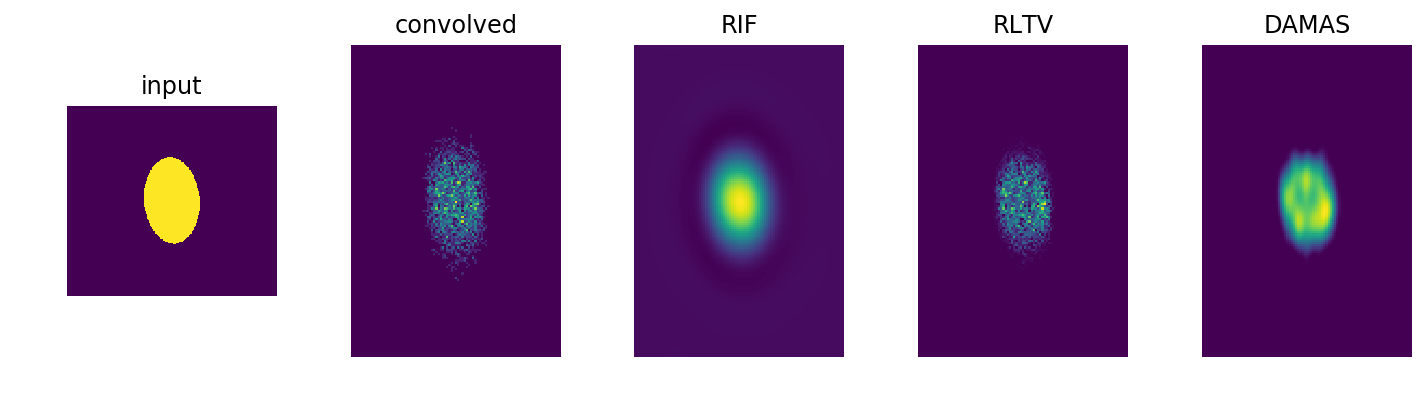

In [4]:
size = (10,7)
fig, axs = plt.subplots(1, 5, figsize=size)
for i in range(len(stack)):
    plt.sca(axs[i])
    plt.title(labels[i])
    p = plt.imshow(stack[i])
    plt.axis('off')
    axs[i].axis('off')
    
plt.tight_layout()
plt.savefig('best_deconvolution.svg', dpi=300)
plt.savefig('best_deconvolution.png', dpi=300)


In [5]:
path = '../../Data/best_deconvolution/'
name = 'cell_000.tif'
inputpath = 'input/'
convpath = 'noise/psf_sigma_0.5_aspect_ratio_4.5_voxel_size_[0.3_0.3_0.3]_noise_poisson_snr=None/'
deconvpath = 'deconvolved/'
deconvpath2 = 'psf_sigma_0.5_aspect_ratio_4.5_voxel_size_[0.3_0.3_0.3]_noise_poisson_snr=None/'
comparepath = ['deconvolution_lab_rif_regularization_lambda=100.0/',
               'deconvolution_lab_rltv_regularization_lambda=0.01_iterations=5.0/',
               'iterative_deconvolve_3d_detect=False_low=2.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/']

In [6]:
img = io.imread(path + inputpath + name)
stack = [img[:,int(img.shape[1]/2)]]
img = io.imread(path + convpath + name)
stack.append(img[:,int(img.shape[1]/2)])
labels = ['input', 'convolved', 'RIF', 'RLTV', 'DAMAS']
for cpath in comparepath:
    img = io.imread(path + deconvpath + cpath + deconvpath2 + name)
    img = img - img.min()
    img = img / img.max() *255
    stack.append(img[:,int(img.shape[1]/2)])
pad_width = int((stack[1].shape[1]*3 - stack[0].shape[1])/2)
stack[0] = np.pad(stack[0], pad_width)
print(stack[0].shape, stack[1].shape)

(263, 290) (144, 97)


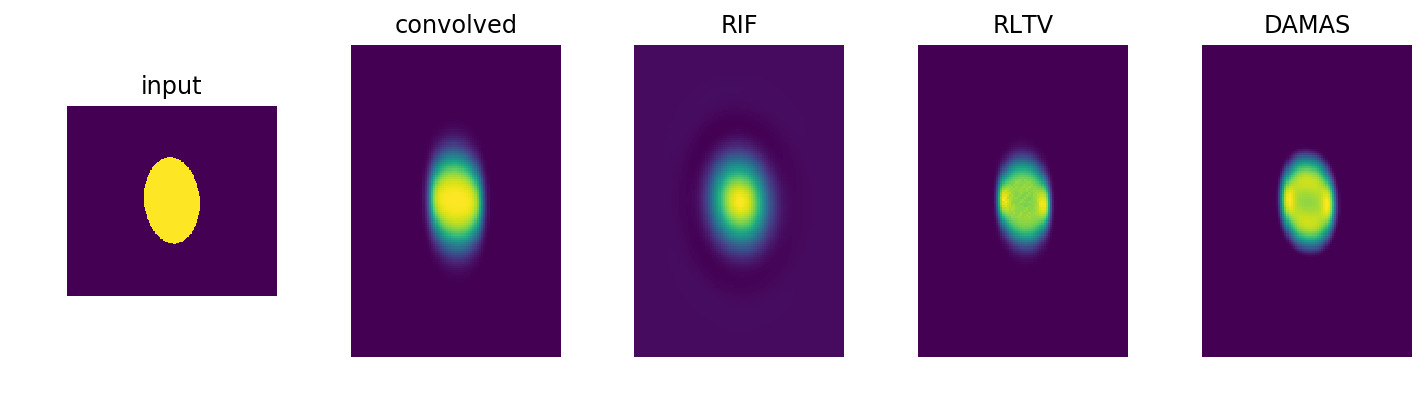

In [7]:
size = (10,7)
fig, axs = plt.subplots(1, 5, figsize=size)
for i in range(len(stack)):
    plt.sca(axs[i])
    plt.title(labels[i])
    p = plt.imshow(stack[i])
    plt.axis('off')
    axs[i].axis('off')
    
plt.tight_layout()
plt.savefig('best_deconvolution_no_noise.svg', dpi=300)
plt.savefig('best_deconvolution_no_noise.png', dpi=300)